In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import dill
import os

list_of_files = glob.glob('data/bas/*.pkl') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)

class dataObject:
    """"""

    def __init__(self, parameters, filename):
        self.populations = []
        self.scores = []
        self.iScores = []
        self.wins = []
        self.filename = filename
        self.parameters = parameters

    def addRep(self, population, scores, iScores, wins):
        self.populations.append(population)
        self.scores.append(scores)
        self.iScores.append(iScores)
        self.wins.append(wins)

    def load(self):
        f = open(self.filename, 'rb')
        tmp_dict = dill.load(f)
        f.close()
        self.__dict__.clear()
        self.__dict__.update(tmp_dict)

    def save(self):
        f = open(self.filename, 'wb')
        dill.dump(self.__dict__, f, 2)
        f.close()

    def calcScore(self):
        return np.max(self.scores[-1])
    
data = dataObject("", latest_file)
data.load()

In [17]:
print(np.max(np.array(data.iScores[0][0]), axis=0))

[57.16226955 91.77237889 86.23879268 87.4070438 ]


General scores mean


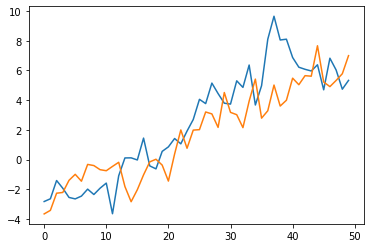

General scores max


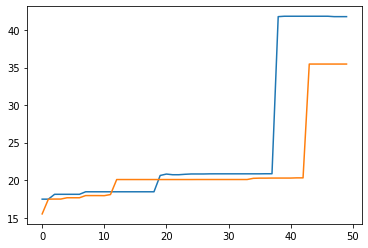

Specialist score over generatie beste score


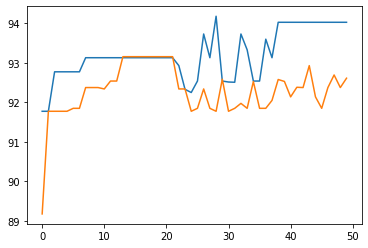

Specialist score per enemy beste score


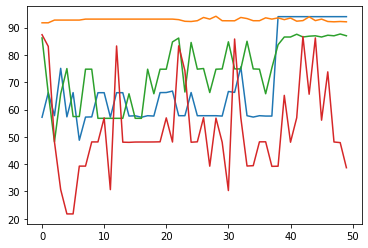

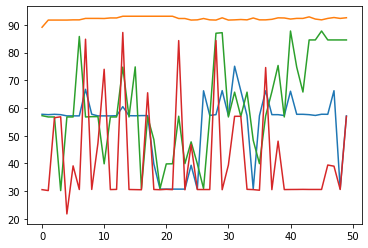

In [39]:
print("General scores mean")
for rep in range(len(data.scores)):
    gens = [np.mean(generation) for generation in data.scores[rep]]
    plt.plot(gens)
plt.show()
    
print("General scores max")
for rep in range(len(data.scores)):
    gensMax = [np.max(generation) for generation in data.scores[rep]]
    plt.plot(gensMax)
plt.show()

print("Specialist score over generatie beste score")
for rep in range(len(data.scores)):
    gensMax = [np.max(generation) for generation in data.iScores[rep]]
    plt.plot(gensMax)
plt.show()

print("Specialist score per enemy beste score")
for rep in range(len(data.scores)):
    enemyScores = np.array([np.max(np.array(d), axis=0) for d in data.iScores[rep]])
    plt.plot(enemyScores)
#     plt.plot(list(enemyScores[:,1]))
#     plt.plot(list(enemyScores[:,2]))
    plt.show()